In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import os
from pathlib import Path 

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [17]:
path = Path(os.getcwd()) 
p_parent = path.parent
css5 = str(p_parent) + '\data\css5.csv'

data = pd.read_csv(css5)\
.set_index("customer_unique_id")

#drop_col = ['nb_review','total_nb_product','total_nb_sellers']

#css5 = css5.drop(drop_col, axis = 1)
pre_cleaned = data.shape
clean_dataset(data)
print("data shape avant cleaning  = " + str(pre_cleaned) + '\n'
      "data shape après cleaning = " + str(data.shape))

data shape avant cleaning  = (96096, 29)
data shape après cleaning =(92288, 29)


In [46]:
# nb de div
d = 2
#nombre de variables
p = data.shape[1]/d
#nombre d'observations
n = int(data.shape[0]/d)


df_1 = data.iloc[:n,:]
df_2 = data.iloc[n:,:]


df_1.shape

(46144, 29)

In [47]:
#centrage réduction des données
data_cr = preprocessing.scale(df_1)

#générer la matrice des liens
matrice = linkage(data_cr,method='ward',metric='euclidean')

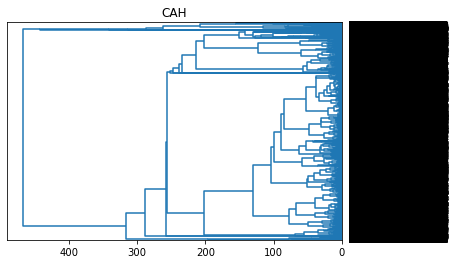

In [52]:
plt.title("CAH")
dendrogram(matrice,labels=df_1.index,orientation='left',color_threshold=0)
plt.show()

ValueError: Dimensions of Z and labels must be consistent.

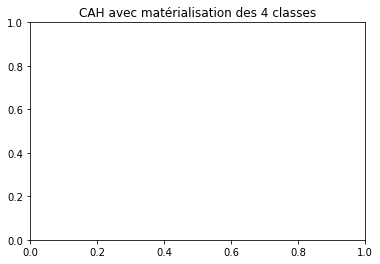

In [49]:
#matérialisation des 4 classes (hauteur t = 7)
#On choisi un niveau égale à 7 pour découper l'arbre 
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(matrice,labels=data.index,orientation='left',color_threshold=7)
plt.show()